<a href="https://colab.research.google.com/github/deepskandpal/hands-on-machine-learning/blob/POC/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from google.colab import files
files.upload()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
kaggle.json


In [3]:
!kaggle competitions download -c titanic


  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 22.8MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 24.4MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.36MB/s]


In [6]:
train_data = pd.read_csv('train.csv')

In [7]:
def pandas_profile(df):
    print(train_data.describe())
    print(train_data.info())
    from pandas_profiling import ProfileReport
    prof = ProfileReport(df)
    prof.to_file(output_file='report.html')

In [8]:
 pandas_profile(train_data)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data colu

TypeError: ignored

In [ ]:
from IPython.display import HTML
report = './report.html'
HTML(filename=report)

In [9]:
train_data_cpy = train_data.drop(['Cabin', 'PassengerId'], axis=1)

In [10]:
train_data_cpy['Age'].fillna((train_data_cpy['Age'].mean()), inplace=True)

In [11]:
train_data_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [12]:
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()
train_data_cpy['Embarked'] = imputer.fit_transform(train_data_cpy['Embarked'])

In [13]:
train_data_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [15]:
def load_dataset(data):
    # load the dataset as a pandas DataFrame
    # retrieve numpy array
    from sklearn_pandas import CategoricalImputer
    y = data['Survived']
    y_train = np.asarray(y).astype('float32')
    data = data.drop(['Survived'], axis=1)
    categorical_data = data.select_dtypes(exclude=[np.number])
    converted_categorical_data = dummyEncode(data)
    numerical_data = data.select_dtypes(include=[np.number])
    converted_numerical_data = normalize_numeric_data(numerical_data)
    df_col = pd.concat([converted_categorical_data,converted_numerical_data], axis=1)
    X = df_col.to_numpy()
    return X, y_train

def dummyEncode(df):
    from sklearn_pandas import CategoricalImputer
    columnsToEncode = list(df.select_dtypes(include=['category','object']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except Exception as e:
            print(e)
            print('Error encoding '+feature)
    return df

# prepare input data
def normalize_numeric_data(data):
    from sklearn import preprocessing
    x = data.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    return df



In [16]:
X, y = load_dataset(train_data_cpy)

In [ ]:
X

In [ ]:
y

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

### Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver='sag', class_weight='balanced', multi_class='multinomial', max_iter=4000)#,random_state=1987)
classifier.fit(X, y)   
predicted_labels = classifier.predict(X) 
acc_count=0 
for i in range(len(predicted_labels)): 
    if predicted_labels[i] == y[i]: 
        acc_count=acc_count+1 
lr_accuracy = float(acc_count/len(predicted_labels)) 
print("LR model accuracy is",lr_accuracy)


LR model accuracy is 0.7867564534231201


In [96]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential() 
    model.add(layers.Dense(64, activation='selu', input_shape=(X_train.shape[1],))) 
    model.add(layers.Dense(32, activation='selu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) 
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50, batch_size=1, verbose=1)
    return history


In [102]:
history = build_model()


Epoch 1/50
596/596 [==============================] - 1s 1ms/step - loss: 4.6647 - acc: 0.5940 - val_loss: 2.6534 - val_acc: 0.5322
Epoch 2/50
596/596 [==============================] - 1s 1ms/step - loss: 3.1927 - acc: 0.6208 - val_loss: 3.4130 - val_acc: 0.6678
Epoch 3/50
596/596 [==============================] - 1s 1ms/step - loss: 2.7246 - acc: 0.6040 - val_loss: 2.0517 - val_acc: 0.6475
Epoch 4/50
596/596 [==============================] - 1s 1ms/step - loss: 2.4690 - acc: 0.6376 - val_loss: 1.6931 - val_acc: 0.5322
Epoch 5/50
596/596 [==============================] - 1s 1ms/step - loss: 1.7630 - acc: 0.6477 - val_loss: 1.2281 - val_acc: 0.6847
Epoch 6/50
596/596 [==============================] - 1s 1ms/step - loss: 1.7035 - acc: 0.6393 - val_loss: 1.4417 - val_acc: 0.6407
Epoch 7/50
596/596 [==============================] - 1s 1ms/step - loss: 1.6294 - acc: 0.6443 - val_loss: 1.4112 - val_acc: 0.6915
Epoch 8/50
596/596 [==============================] - 1s 1ms/step - loss: 1.

In [98]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

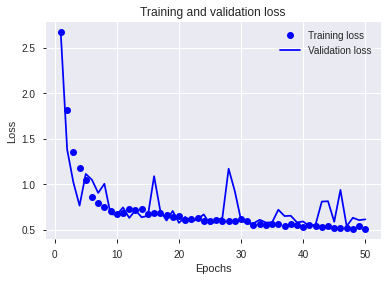

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss'] 
acc = history_dict['acc'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

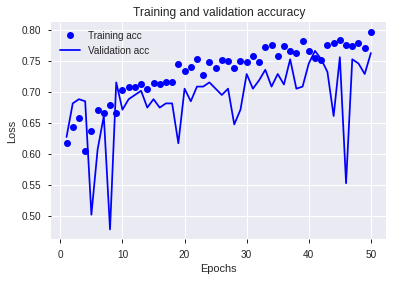

In [100]:
plt.clf() 
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()